In [1]:
import ROOT
import my_library.common_analysis_tools as tools
import my_library.constants as constants
import my_library.kinematic_cuts as kcuts

Welcome to JupyROOT 6.24/04


In [2]:
c1 = ROOT.TCanvas("c1", "c1", 800, 600)
c1.Divide(4, 2)
c2 = ROOT.TCanvas("c2", "c2", 800, 600)
c2.Divide(4, 2)

e = 7, t = 1
e = 7, t = 2
e = 7, t = 3
e = 7, t = 4
e = 7, t = 5
e = 7, t = 6
e = 7, t = 7
e = 8, t = 1
e = 8, t = 2
e = 8, t = 3
e = 8, t = 4
e = 8, t = 5
e = 8, t = 6
e = 8, t = 7
e = 9, t = 1
e = 9, t = 2
e = 9, t = 3
e = 9, t = 4
e = 9, t = 5
e = 9, t = 6
e = 9, t = 7
e = 10, t = 1
e = 10, t = 2
e = 10, t = 3
e = 10, t = 4
e = 10, t = 5
e = 10, t = 6
e = 10, t = 7
e = 11, t = 1
e = 11, t = 2
e = 11, t = 3
e = 11, t = 4
e = 11, t = 5
e = 11, t = 6
e = 11, t = 7


Info in <TCanvas::Print>: png file kkp_comparison_e7.png has been created
Info in <TCanvas::Print>: png file kkp_ratio_e7.png has been created
Info in <TCanvas::Print>: png file kkp_comparison_e8.png has been created
Info in <TCanvas::Print>: png file kkp_ratio_e8.png has been created
Info in <TCanvas::Print>: png file kkp_comparison_e9.png has been created
Info in <TCanvas::Print>: png file kkp_ratio_e9.png has been created
Info in <TCanvas::Print>: png file kkp_comparison_e10.png has been created
Info in <TCanvas::Print>: png file kkp_ratio_e10.png has been created
Info in <TCanvas::Print>: png file kkp_comparison_e11.png has been created
Info in <TCanvas::Print>: png file kkp_ratio_e11.png has been created


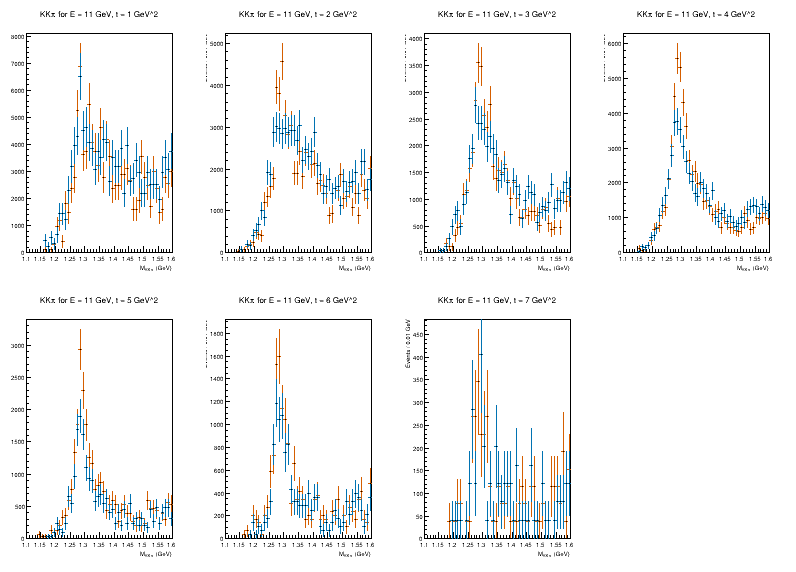

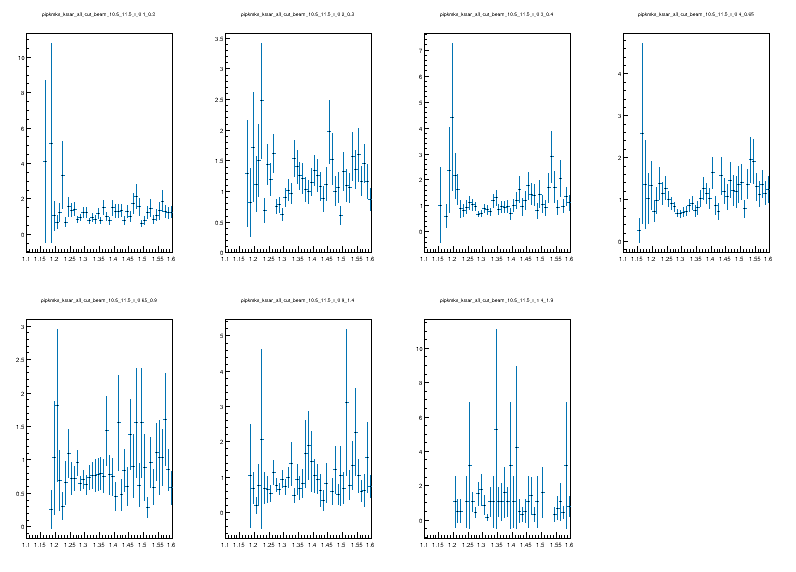

In [4]:
for e in range(7, 12):
    hists_pipkmks = []
    hists_pimkpks = []
    ratio_plots = []
    for t in range(1, 8):
        print('e = ' + str(e) + ', t = ' + str(t))
        hist_pipkmks = tools.get_gluex1_binned_kkpi_data('pipkmks', 'all', e, t)
        hist_pimkpks = tools.get_gluex1_binned_kkpi_data('pimkpks', 'all', e, t)
        acceptance_pipkmks = tools.get_binned_gluex1_signal_acceptance('pipkmks', e, t, cut='all', error=False)
        acceptance_pimkpks = tools.get_binned_gluex1_signal_acceptance('pimkpks', e, t, cut='all', error=False)
        hist_pipkmks.Scale(1/acceptance_pipkmks)
        hist_pimkpks.Scale(1/acceptance_pimkpks)
        hist_pipkmks.GetXaxis().SetRangeUser(1.1, 1.6)
        hist_pimkpks.GetXaxis().SetRangeUser(1.1, 1.6)
        hist_pipkmks.SetLineColor(ROOT.TColor.GetColor(constants.COLORBLIND_HEX_DICT['blue']))
        hist_pimkpks.SetLineColor(ROOT.TColor.GetColor(constants.COLORBLIND_HEX_DICT['red']))
        hist_pimkpks.SetTitle('KK#pi for E = ' + str(e) + ' GeV, t = ' + str(t) + ' GeV^2')
        hist_pimkpks.GetXaxis().SetTitle('M_{KK#pi} (GeV)')
        hist_pimkpks.GetYaxis().SetTitle('Events / 0.01 GeV')
        hists_pipkmks.append(hist_pipkmks)
        hists_pimkpks.append(hist_pimkpks)
        ratio = hist_pipkmks.Clone()
        ratio.Divide(hist_pimkpks)
        # ratio_plot = ROOT.TRatioPlot(hist_pipkmks, hist_pimkpks)
        # ratio_plots.append(ratio_plot)
        ratio_plots.append(ratio)
        c1.cd(t)
        hists_pimkpks[t-1].Draw()
        hists_pipkmks[t-1].Draw('same')
        # ratio_plots[t-1].Draw()
        c1.Update()
        c2.cd(t)
        ratio_plots[t-1].Draw()
    c1.Draw()
    c1.SaveAs('kkp_comparison_e' + str(e) + '.png')
    c2.Draw()
    c2.SaveAs('kkp_ratio_e' + str(e) + '.png')
